# Particle Swarn Optimization

## Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

## Code + object

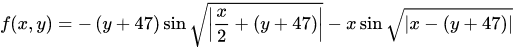

In [7]:
def eggholder(x,y):
    return -(y+47)*np.sin(np.sqrt(abs(x/2+(y+47))))-x*np.sin(np.sqrt(abs(x-y-47)))

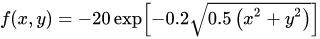

In [129]:
def ackley(x,y):
    return -20*np.exp(-0.2*np.sqrt(0.5*(x**2+y**2)))-np.exp(0.5*(np.cos(2*pi*x)+np.cos(2*pi*y)))+np.exp(1)+20

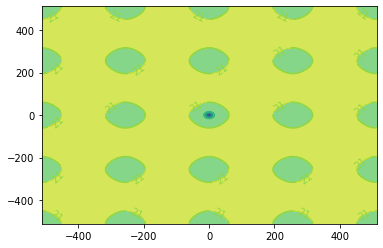

In [130]:
x = np.linspace(-512, 512, 256)
y = np.linspace(-512, 512, 256)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, ackley(X, Y), 5, alpha=.75)
C = plt.contour(X, Y, ackley(X,Y), 5)
plt.clabel(C, inline=1, fontsize=10)
#plt.xticks(())
#plt.yticks(())

plt.show()

In [144]:
def obj(p):
    aux=np.zeros(len(p))
    auxbis=0
    for i in p:
        aux[auxbis]=eggholder(i[0],i[1])
        auxbis+=1
    return aux

In [239]:
def PSO(obj, p_num, N, scale, w=0.5, r=0.99, c1=1.0, c2=1.0, eps=1e-5, 
        early_stopping=100, max_iter=1000, random_state=None):
    # initialize the positions
    oldgbest=[]
    oldp=[]
    oldv=[]
    np.random.seed(random_state)
    p = 1024*np.random.random_sample(size=(p_num, N))-512
    v = 100*np.random.random_sample(size=(p_num, N))-50
    pbest=p.copy()
    values=obj(p)
    values_best=obj(pbest)
    mins=[]
    gbest=p[values.argmin()] #argmin returns the index of the best minimum
    oldgbest.append(list(gbest))
    oldp.append(list(p))
    oldv.append(list(v))
    mins.append(values.min())
    #initialize the velocities by following the formula  
    r1=np.random.random_sample(size=(p_num,N))
    r2=np.random.random_sample(size=(p_num,N))
    # update every particle positions
    iter_num=0
    print('initial coordinates')
    for i in p:
        print(i)
    print('----')
    while iter_num < max_iter:
        #print('Iteration ',iter_num)
        #print(c1 * r1 * (pbest - p) + c2 * r2 * (gbest - p))
        v = w * v + c1 * r1 * (pbest - p) + c2 * r2 * (gbest - p)
        w = 0.6-((0.6-0.3)/max_iter)*iter_num
        p = p + v
        #let's update gbest if needed, as well as every pbest
        values=obj(p)
        if values.min()<mins[-1]:
            #gbest gets changed
            print("gbest has been updated from ",gbest," to",p[values.argmin()],' ---> ',mins[-1])
            gbest=p[values.argmin()]
            mins.append(values.min())
            oldgbest.append(gbest)
            if abs(mins[-1]-mins[-2])<eps:
                break
        for i in range(len(p)):
            if values_best[i]>values[i]:
                pbest[i]=p[i]
                #print("Updated pbest for particle ",i," to ",pbest[i])
        iter_num+=1
        if iter_num == max_iter:
            print(iter_num, 'maximum iterations reached!','Try increasing max_iter or adjusting PSO parameters for better result.')
        #print('----')
        oldp.append(p)
        oldv.append(v)
    print('finito')
    return iter_num, np.array(gbest), mins[-1],oldgbest,oldp,oldv

a,b,c,oldgbest,oldp,oldv=PSO(obj,1600,2,200)


initial coordinates
[-353.2122603  -425.54672519]
[507.90157982 246.28251628]
[107.20349635   9.8852404 ]
[ 335.91953892 -338.03490158]
[ 37.48307965 159.94552663]
[-271.94163603  163.92866442]
[-31.28797324  81.84431403]
[ 341.82018331 -347.02683886]
[-171.9370279  -449.23979316]
[-194.67131594  237.74481121]
[ -10.54744012 -337.5359892 ]
[  13.8824305  -131.17351198]
[ -64.36829587 -489.64425225]
[505.34875802 155.44163098]
[-183.37566618 -439.58314871]
[-146.84512774  263.7145643 ]
[ 479.66145579 -323.66916328]
[274.61642695 359.74626554]
[-96.05599606 -31.3695994 ]
[-444.10607024  401.42385514]
[-337.16582915  156.82851181]
[-385.14186033  459.6894325 ]
[ 99.0660741  -56.04103717]
[-89.43369665 -22.38117555]
[329.19020341 -21.38452182]
[-257.66215691   79.7547862 ]
[-127.87607836  -50.08868605]
[170.31497965 -90.87218706]
[ 319.09723292 -285.54837502]
[-369.84880319 -219.00032032]
[-329.87070214 -184.46366433]
[451.73354309 440.81064837]
[406.02224366  83.13027135]
[-355.73857337  

[309.65556499 274.15983625]
[318.90284743 219.46645886]
[ -83.75386777 -369.52876934]
[-300.13998554  486.60952091]
[ 325.69426662 -374.96620761]
[-127.09727612 -171.61875047]
[-404.50576191 -216.70702829]
[-257.82087199  489.71797507]
[ 431.94730843 -332.39667126]
[ 349.74113565 -465.53783942]
[-461.01600169 -405.43821608]
[-227.48966368   27.10666084]
[-196.36455575 -411.11931908]
[-106.77569537 -161.19569839]
[-463.82352931 -266.14805637]
[-50.50589101 111.76078339]
[ -19.58226471 -469.15993857]
[ 377.88603221 -363.57823352]
[ 405.98870782 -135.07441928]
[-394.94782009 -427.26855676]
[-266.02073148   -4.24484578]
[303.81107443 -87.20797031]
[ 482.81724755 -472.29552945]
[ 306.13234382 -264.48913384]
[-283.04224325   38.54359487]
[-378.44741025 -381.94129391]
[-494.15853171   95.15692278]
[-358.33553953 -245.52011482]
[-79.4556794 260.3644529]
[  37.42708733 -180.66955115]
[381.89558111  44.80158977]
[ 415.75078007 -414.3253785 ]
[161.05613966 346.84787441]
[294.82671967 261.59447316

gbest has been updated from  [1484.57722854 1234.13280752]  to [1861.47268355 1090.87759572]  --->  -2550.9123523943417
gbest has been updated from  [1861.47268355 1090.87759572]  to [1871.68106536 1108.36540199]  --->  -2960.7693036223195
gbest has been updated from  [1871.68106536 1108.36540199]  to [2120.58530854  979.73437267]  --->  -3005.6458516478156
gbest has been updated from  [2120.58530854  979.73437267]  to [2115.68017359  980.69564507]  --->  -3130.572025590207
gbest has been updated from  [2115.68017359  980.69564507]  to [2435.7370066   848.39535044]  --->  -3136.633245846294
gbest has been updated from  [2435.7370066   848.39535044]  to [2414.60858844  829.91164464]  --->  -3253.7188666423026
gbest has been updated from  [2414.60858844  829.91164464]  to [2419.4325674   829.21836764]  --->  -3283.285453835407
gbest has been updated from  [2419.4325674   829.21836764]  to [2802.79325549  684.86466668]  --->  -3289.2281388329616
gbest has been updated from  [2802.79325549

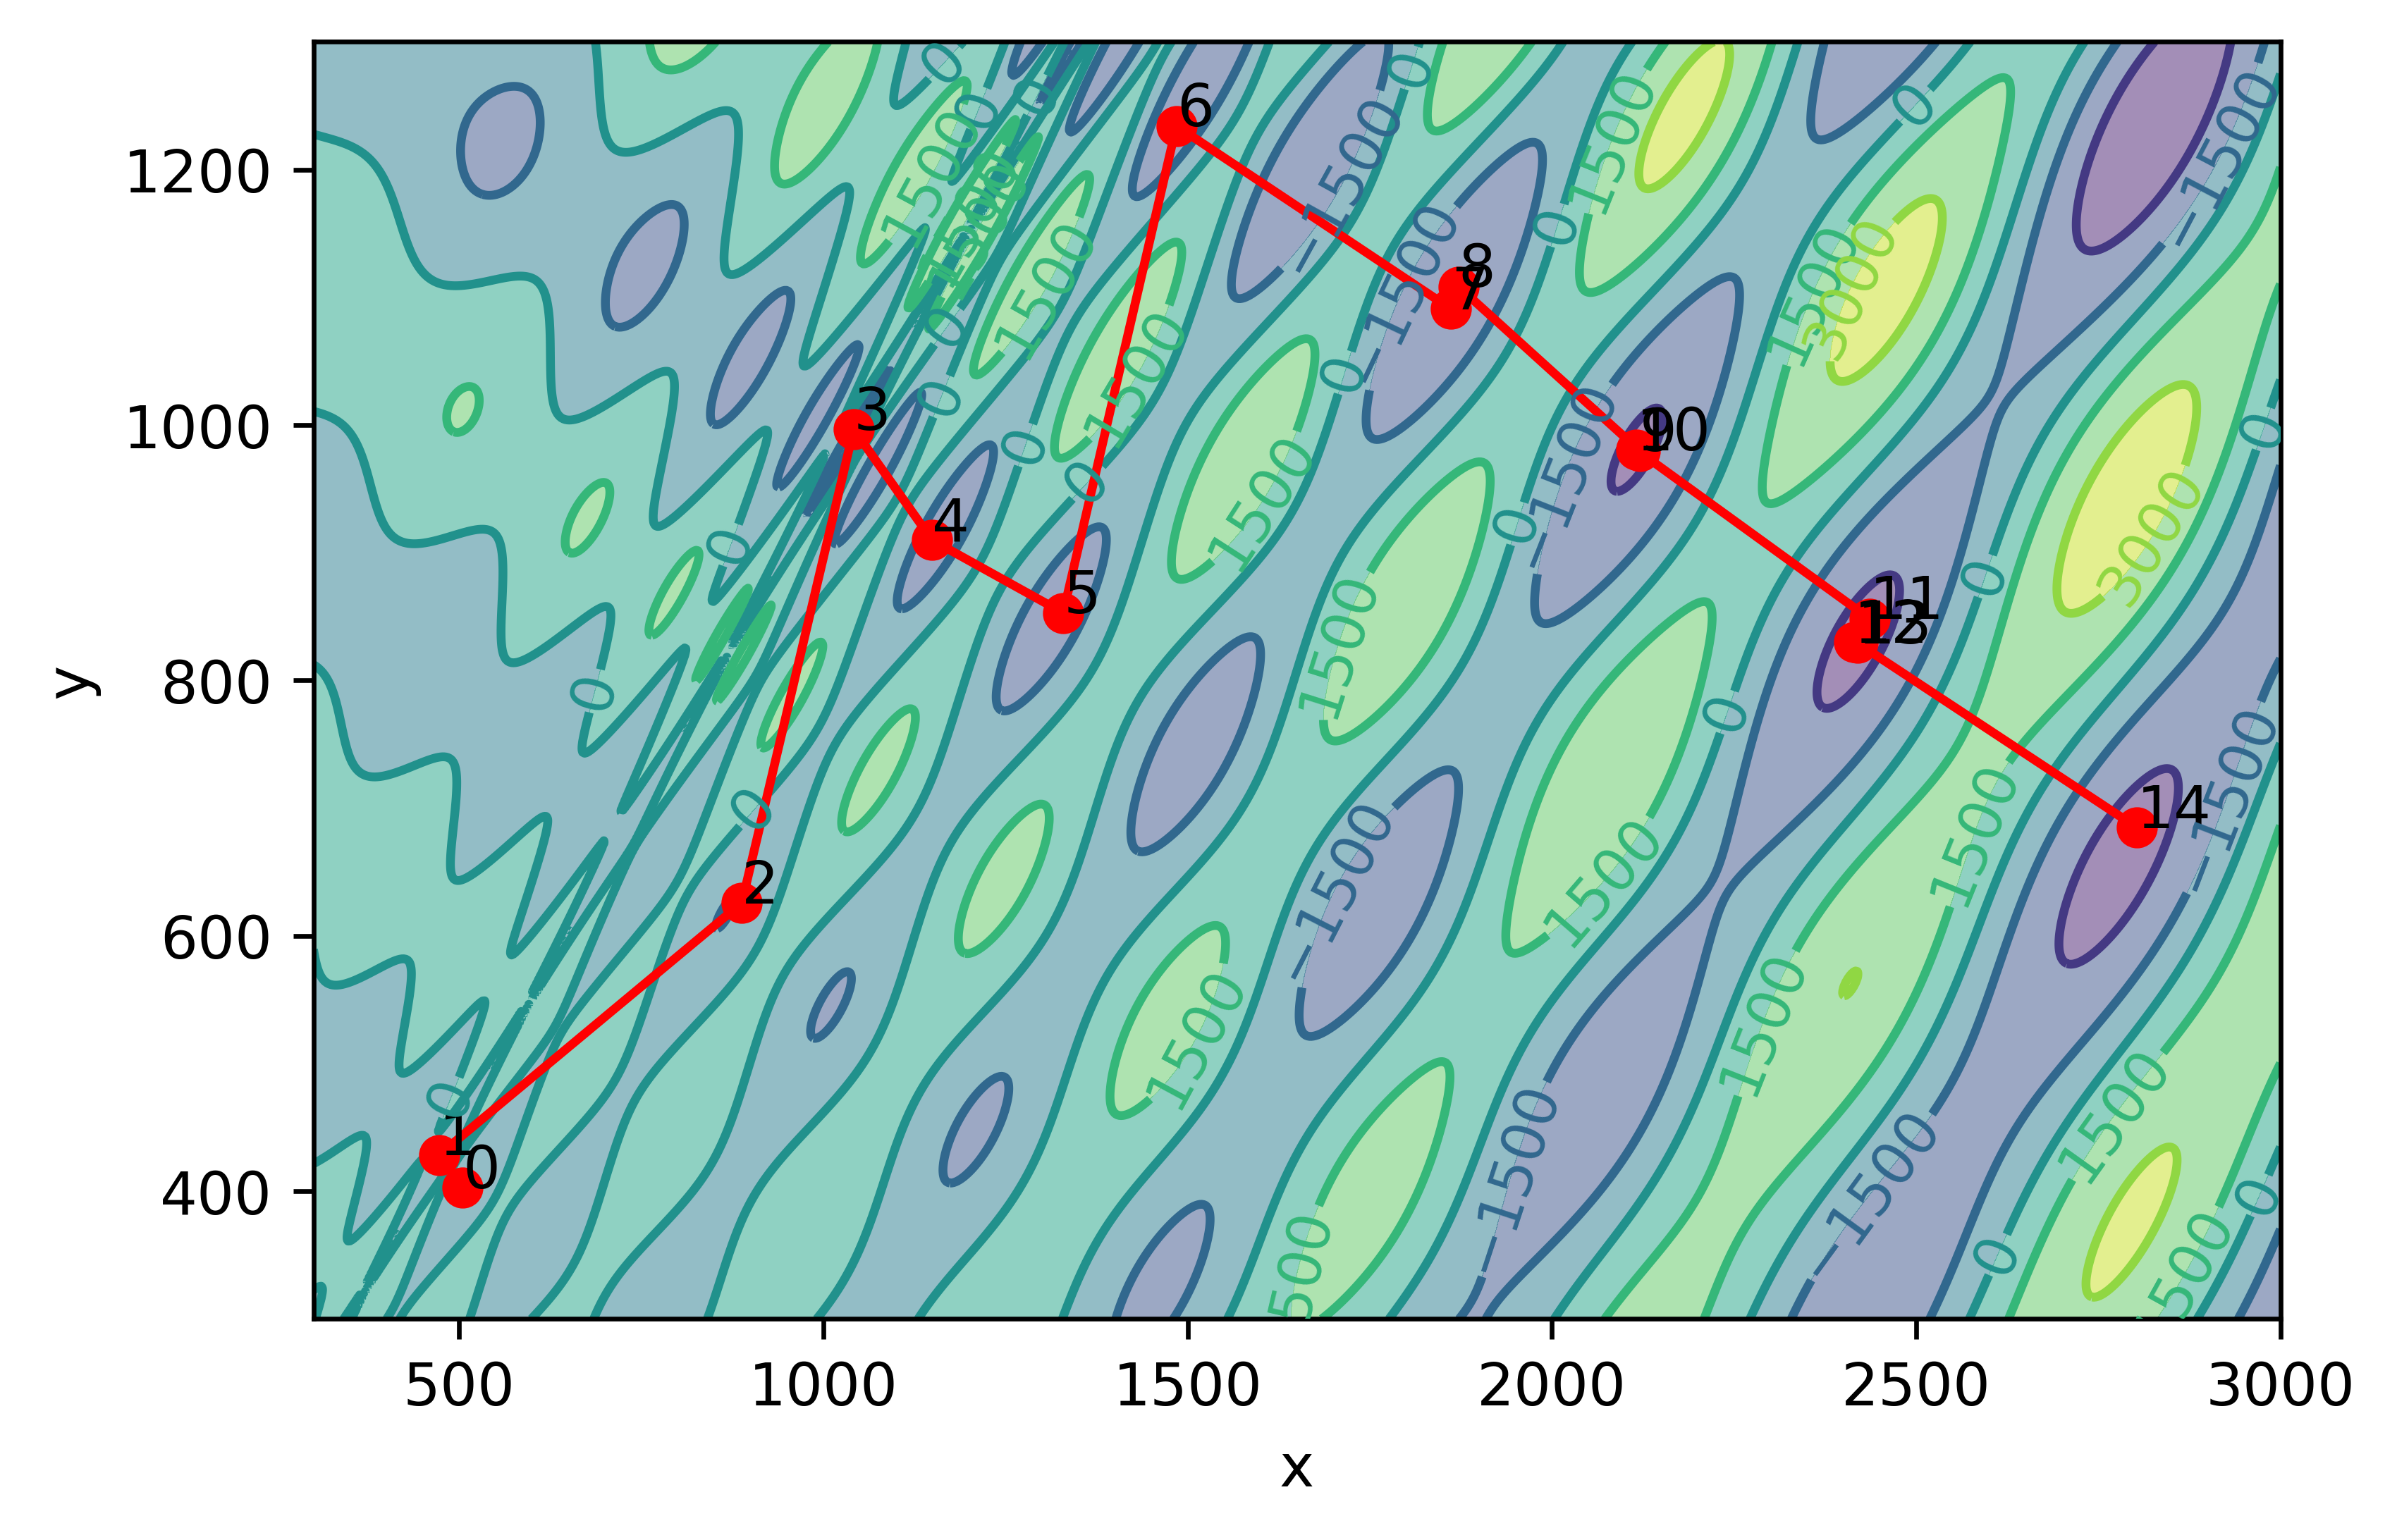

In [244]:
x = np.linspace(300, 3000, 1024)
y = np.linspace(300, 1300, 1024)
X, Y = np.meshgrid(x, y)

plt.figure(dpi=600)
plt.contourf(X, Y, eggholder(X, Y), 5, alpha=0.5)
C = plt.contour(X, Y, eggholder(X,Y), 5)
plt.clabel(C, inline=1, fontsize=10)
#plt.xticks(())
#plt.yticks(())
oX,oY=[],[]
for el in oldgbest:
    oX.append(el[0])
    oY.append(el[1])
    if len(oX)==15:
        break
plt.plot(oX,oY,marker='o',color='red')
for i in range(len(oX)):
    plt.annotate(i,(oX[i],oY[i]))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Affichage des vecteurs

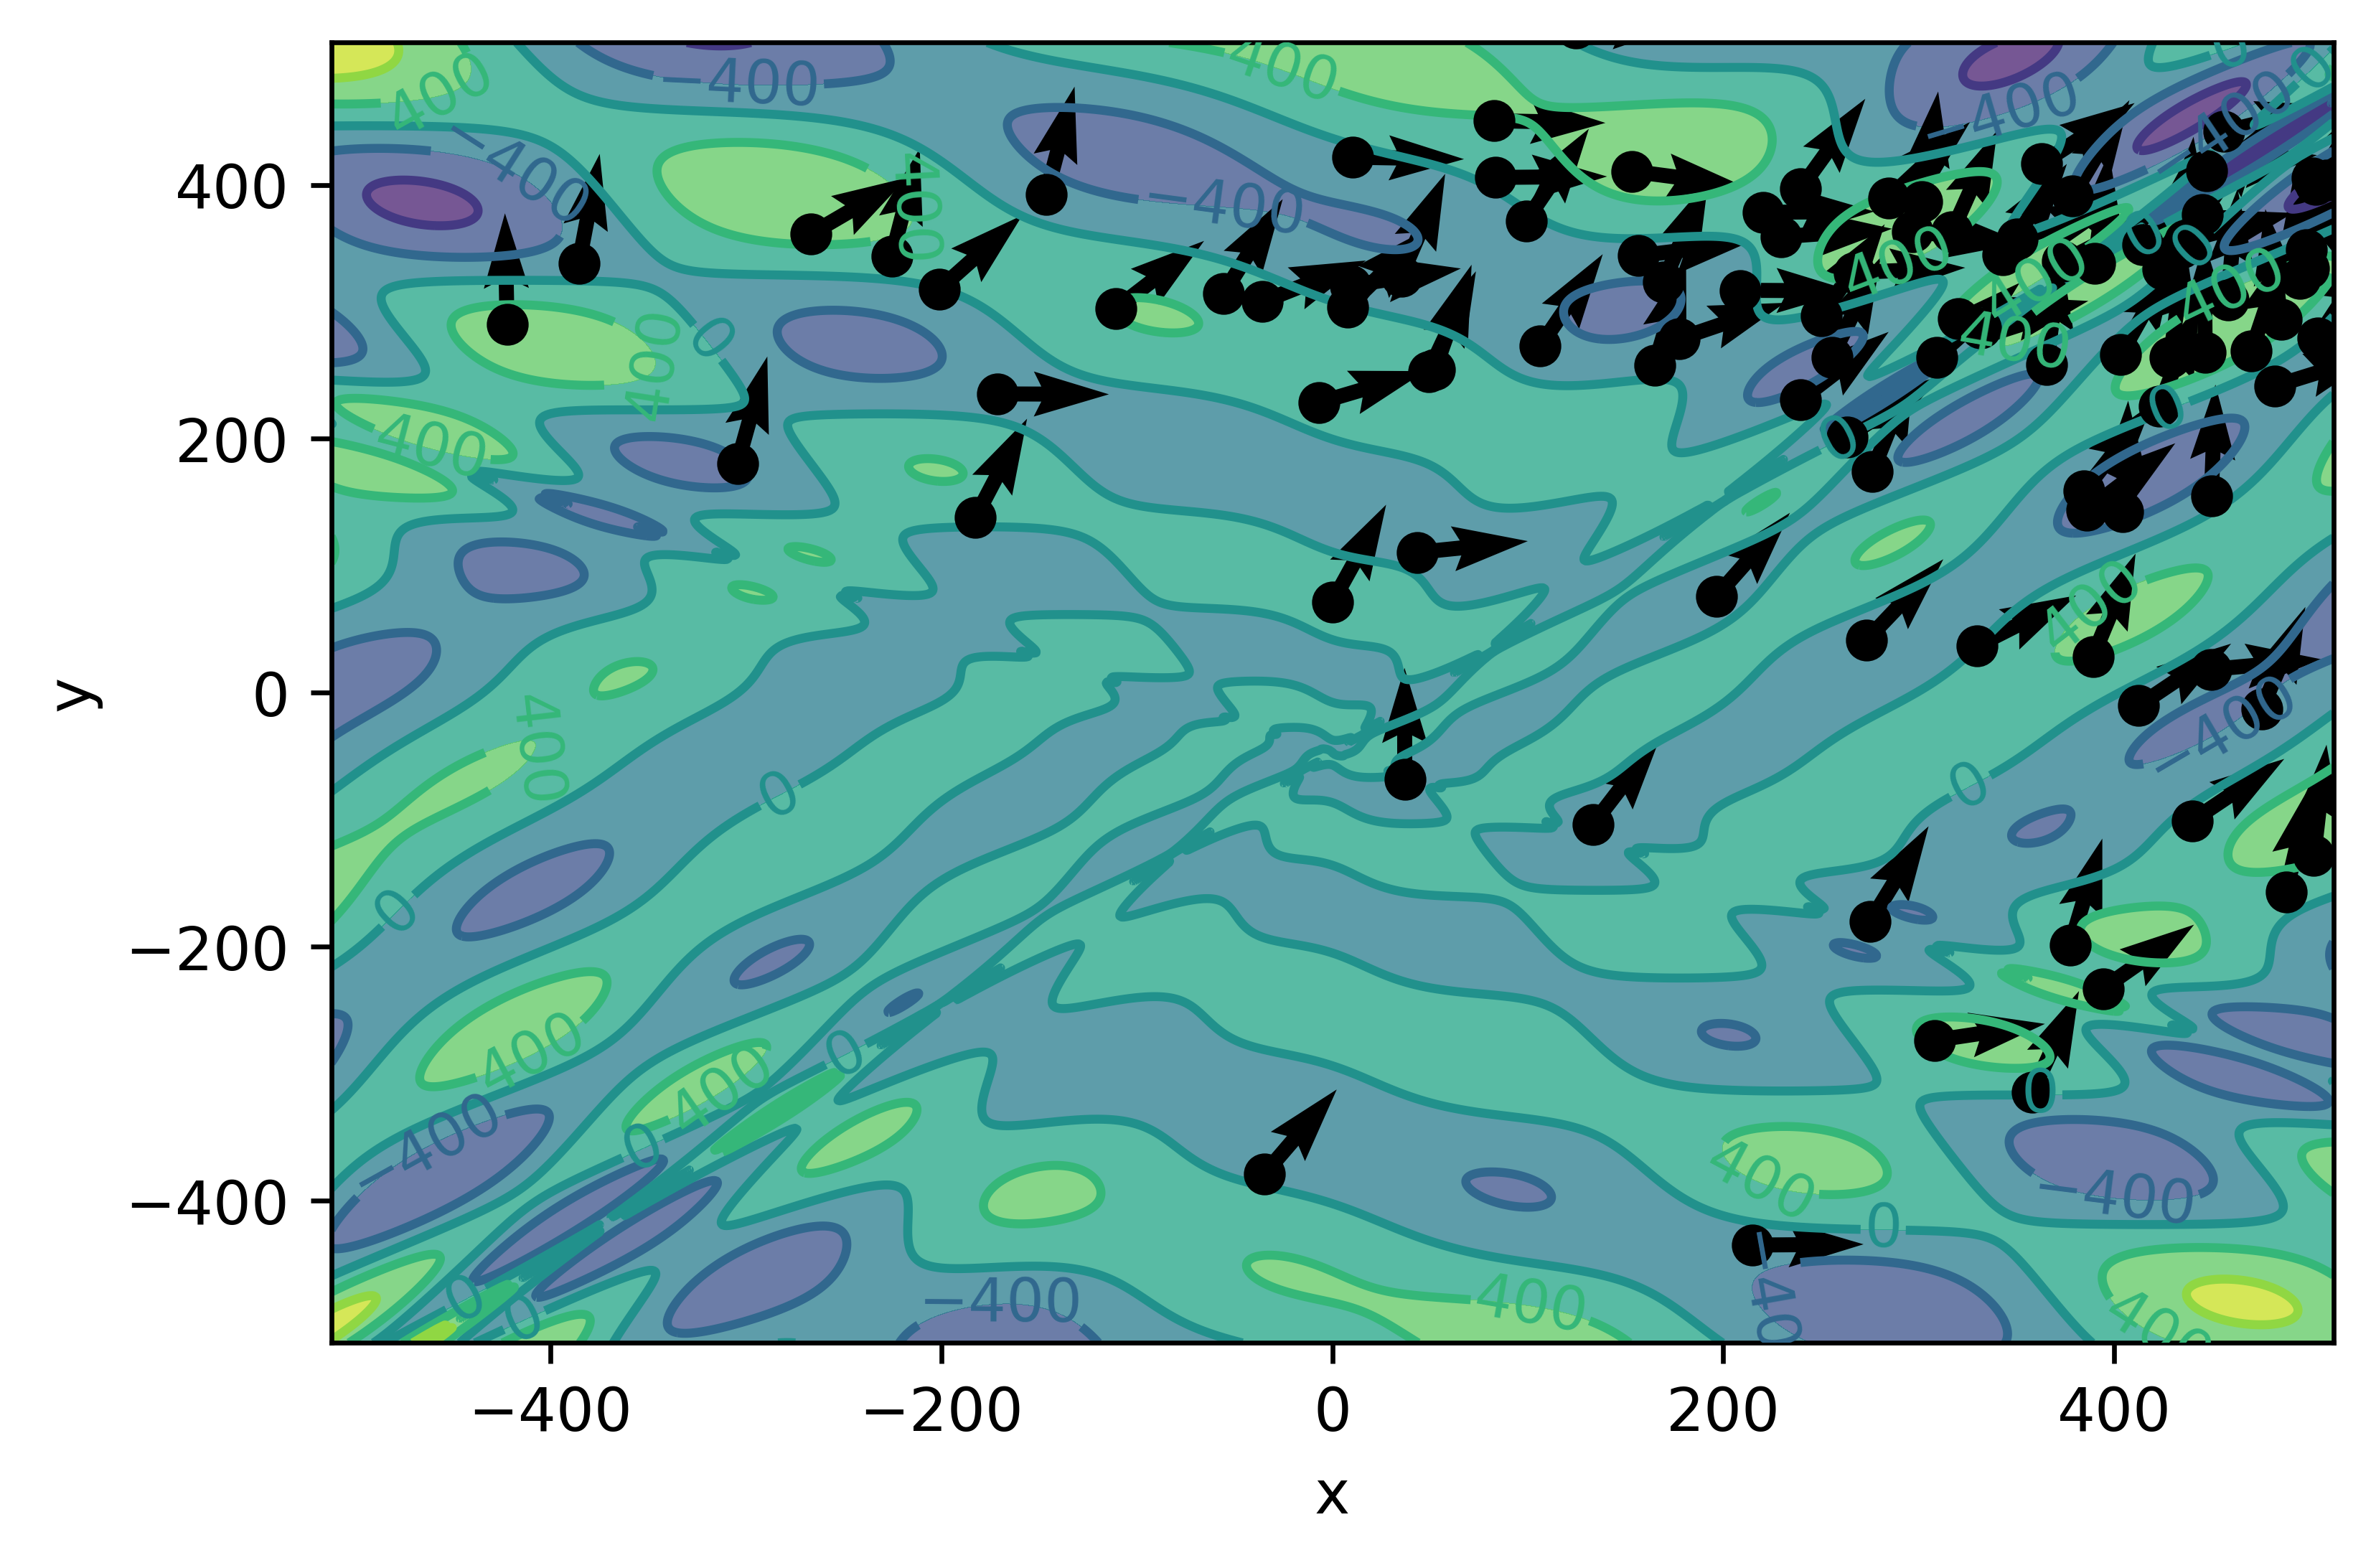

<Figure size 432x288 with 0 Axes>

In [250]:
x = np.linspace(-512, 512, 1024)
y = np.linspace(-512, 512, 1024)
X, Y = np.meshgrid(x, y)
plt.figure(dpi=600)
plt.contourf(X, Y, eggholder(X, Y), 5, alpha=0.75)
C = plt.contour(X, Y, eggholder(X,Y), 5)
plt.clabel(C, inline=1, fontsize=10)
#plt.xticks(())
#plt.yticks(())
vecX,vecY=[],[]
pX,pY=[],[]
iteration=1
for el in oldp[iteration]:
    pX.append(el[0])
    pY.append(el[1])
    if len(pX)>100: break
for el in oldv[iteration]:
    vecX.append(el[0])
    vecY.append(el[1])
    if len(vecX)>100: break
plt.plot(pX,pY,marker='o',color='black',linewidth=0)
for i in range(len(pX)):
    plt.quiver(pX[i],pY[i],vecX[i],vecY[i])
plt.xlabel('x')
plt.xlim(-512,512)
plt.ylim(-512,512)
plt.ylabel('y')
plt.show()
plt.savefig('ite1.png')